In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

In [2]:
final_data=open('final_data.pkl','rb')
df=pickle.load(final_data)

In [3]:
df.head()

,diagnosis,radius_mean,concavity_mean,radius_se,compactness,concave points
0,1,17.99,0.3001,1.0950,0.94320,0.41250
1,1,20.57,0.0869,0.5435,0.26524,0.25617
2,1,19.69,0.1974,0.7456,0.58440,0.37090
3,1,11.42,0.2414,0.4956,1.15020,0.36270
4,1,20.29,0.1980,0.7572,0.33780,0.26680


## lets use standard scaler

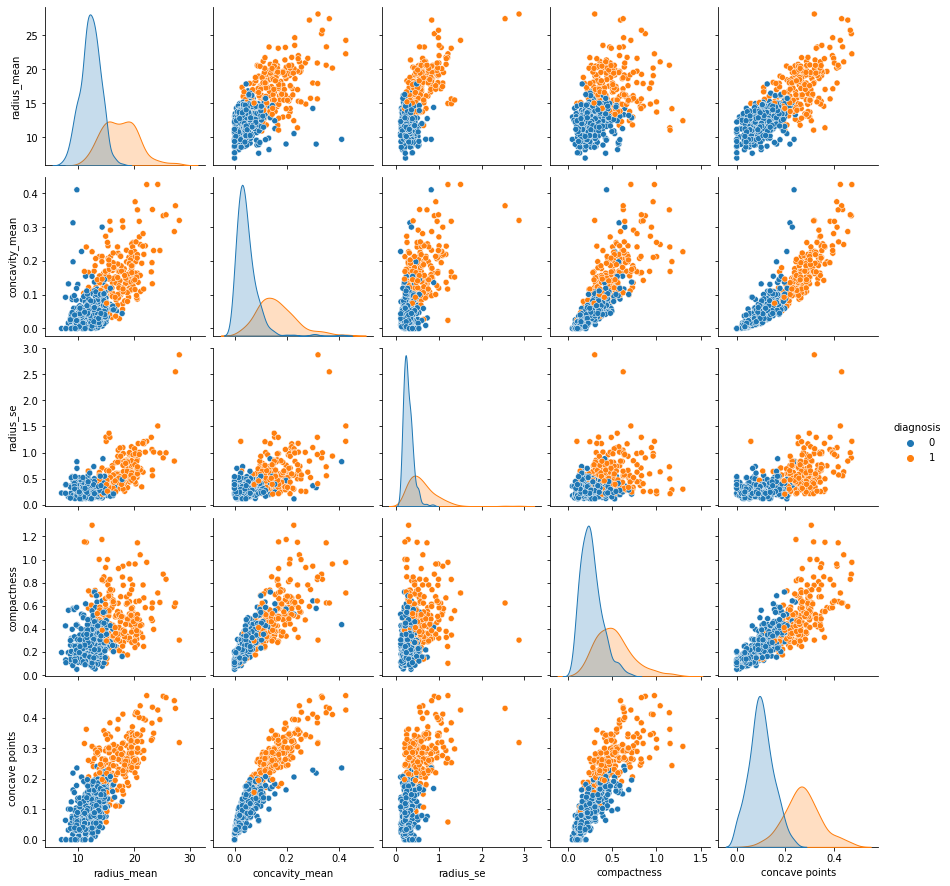

In [4]:
sns.pairplot(data=df,hue='diagnosis')

In [5]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [6]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
X_scaled=pd.DataFrame(std.fit_transform(x),columns=x.columns)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [11]:
accuracy_rate=[]

for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_train,y_train,cv=10)
    accuracy_rate.append(score.mean())
    

In [12]:
print(accuracy_rate)

[0.8946376811594204, 0.9166183574879228, 0.9187439613526569, 0.9298067632850241, 0.9254106280193236, 0.9297584541062802, 0.9297101449275363, 0.9297101449275363, 0.927536231884058, 0.9340579710144927, 0.927536231884058, 0.9363285024154588, 0.9319323671497586, 0.9341062801932367, 0.9341545893719807, 0.9319323671497586, 0.9342028985507247, 0.9364251207729468, 0.9319806763285025, 0.9275845410628019, 0.9298067632850241, 0.9275845410628019, 0.9342028985507247, 0.9342028985507247, 0.9342028985507247, 0.9275845410628019, 0.9320289855072463, 0.9254106280193237, 0.9342028985507247]


<AxesSubplot:>

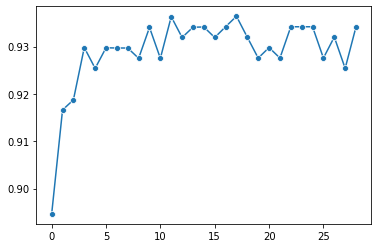

In [13]:
sns.lineplot(data=accuracy_rate,marker='o',)

### So now we will chose n_neighbors=13 since it gave us best results

In [14]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.93      0.89      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



## Using Ramdom Forest classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[20,50,100,200]
bootstrap = [True, False]
random_grid={'n_estimators':n_estimators,'bootstrap':bootstrap}

rfc_random=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=random_grid,n_iter=100,cv=10,random_state=0)
rfc_random.fit(x_train,y_train)

c:\users\sekhu\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'n_estimators': [20, 50, 100, 200]},
                   random_state=0)

In [18]:
rfc_random.best_params_
rfc_pred=rfc_random.predict(x_test)

In [27]:
print(rfc_random.cv_results_)

{'mean_fit_time': array([0.03483024, 0.07779827, 0.15379632, 0.30339131, 0.02850361,
       0.06879714, 0.13340373, 0.26199684]), 'std_fit_time': array([0.00874554, 0.00840241, 0.00949534, 0.02458662, 0.00066577,
       0.00394512, 0.00816202, 0.00604738]), 'mean_score_time': array([0.00380523, 0.00660551, 0.01089809, 0.02010322, 0.00359905,
       0.00620158, 0.01039939, 0.01930151]), 'std_score_time': array([0.00089856, 0.00067539, 0.00070146, 0.00112973, 0.00049008,
       0.00039923, 0.00065037, 0.00046367]), 'param_n_estimators': masked_array(data=[20, 50, 100, 200, 20, 50, 100, 200],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_bootstrap': masked_array(data=[True, True, True, True, False, False, False, False],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 20, 'bootstrap': True}, {'n_esti

In [28]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        67
           1       0.89      0.89      0.89        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print('Accuracy of XGB model is {}'.format(accuracy_score(y_test,rfc_pred)*100))

Accuracy of XGB model is 91.22807017543859


### XGBoost classifier

In [ ]:
import xgboost

xgb=xgboost.XGBClassifier()

In [ ]:
params={
    'learning_rate':[0.05,0.09,0.1,0.3,0.5],
    'max_depth':[3,4,5,8,10,12],
    'max_child_weight':[1,3,5,7],
    'gamma':[0.1,0.2,0.3,0.4]
}

In [ ]:
xgb_random=RandomizedSearchCV(estimator=xgb,param_distributions=params,n_iter=50,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

In [ ]:
xgb_random.fit(x_train,y_train)

In [ ]:
xgb_random.best_params_

In [ ]:
xgb_random.best_estimator_

In [ ]:
xgb_best=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05,
              max_child_weight=7, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
xgb_best.fit(x_train,y_train)
xgb_pred=xgb_best.predict(x_test)

In [ ]:
print(classification_report(y_test,xgb_pred))

## Now we will use Gradient boosting technique

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad_model=GradientBoostingClassifier()
params={'learning_rate':[0.05,0.08,0.1,0.5],
       'n_estimators':[50,100,200,500],
       'max_depth':[2,3,5,7]}

gradboost_model=RandomizedSearchCV(grad_model,param_distributions=params,n_iter=50,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

In [ ]:
gradboost_model.fit(x_train,y_train)

In [ ]:
grad_pred=gradboost_model.predict(x_test)

In [ ]:
gradboost_model.best_estimator_

In [ ]:
print(classification_report(y_test,grad_pred))

### Using Ada Boost 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada=AdaBoostClassifier()

params={
    'n_estimators':[50,100,200],
    'learning_rate':[0.05,0.1,0.5,1,2],
    'algorithm':['SAMME', 'SAMME.R'],
}

ada_boost_model=RandomizedSearchCV(ada,param_distributions=params,n_iter=50,cv=10,n_jobs=-1,scoring='roc_auc',verbose=3)


In [ ]:
ada_boost_model.fit(x_train,y_train)

In [ ]:
ada_predict=ada_boost_model.predict(x_test)
print(classification_report(y_test,y_pred)) # it performed bad actually !!